<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>
<center>ML3: Plastion - Cement Strength Prediction - Regression</center>
<center>By : Mahesh Ambokar - Jan 2021 Cohort</center>

# Project Description

## Company Introduction 


    Client for this project is a major Concrete Producer.

    •	Their concrete stands out to be one of the best in the business and holds a contract with five of the most well known real estate companies.

    •	Recently, they have developed a new kind of concrete which requires less water and is stronger and better than the concrete they used to sell.

    •	They have few competitors who are also developing new kinds of concrete to launch in the market to get more clients.


### Current Scenario

    •	The regular price of concrete per cubic yard is around $100 to $200 but due to market inflation the current price has gone down and the company is at loss.

    •	The company has developed a new concrete solution which can be a potential game-changer for the company in the market but they are not sure about the concrete compressive strength which is a very important factor for concrete sale.


## Problem Statement

    The current process suffers from the following problems:

    •	The company is under a time crunch to test the compressive strength of the concrete to release in the market.

    •	Previously they were using manual methods to test the compressive strength of the concrete which is very time-consuming and inefficient.


    The company has hired you as data science consultants. They want to automate the process of predicting the compressive strength of the concrete, based on the materials used.

    Your Role
    •	You are given a dataset containing materials used in the concrete.

    •	Your task is to build a regression model using the dataset.

    •	Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.



## Project Deliverables

    •	Deliverable: Predict the compressive strength of concrete.

    •	Machine Learning Task: Regression

    •	Target Variable: csMPa

    •	Win Condition: N/A (best possible model)



## Evaluation Metric

    •	The model evaluation will be based on the RMSE score.

    •	To learn about RMSE’s Python implementation, please visit this link.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x) 

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")    

In [2]:
df_concrete = pd.read_csv("concrete_train.csv")
df_concrete_p = pd.read_csv("concrete_test.csv")

In [3]:
df_concrete.describe()

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,824.00000,824.00000,824.00000,824.00000,824.00000,824.00000,824.00000,824.00000,824.00000,824.00000
mean,513.84709,283.36080,74.37160,53.16080,181.79709,6.16396,973.54854,772.10740,44.66141,35.85786
std,296.78678,107.53640,86.97778,64.00065,21.32190,5.96726,78.69463,80.98472,60.47570,16.86510
min,0.00000,102.00000,0.00000,0.00000,121.80000,0.00000,801.00000,594.00000,1.00000,2.33000
25%,251.75000,192.00000,0.00000,0.00000,164.90000,0.00000,932.00000,726.77500,12.25000,23.68500
50%,513.50000,275.10000,22.00000,0.00000,185.35000,6.10000,968.00000,778.50000,28.00000,34.08000
75%,770.25000,359.90000,144.77500,118.30000,192.00000,10.12500,1040.60000,821.25000,56.00000,45.86250
max,1028.00000,540.00000,359.40000,195.00000,247.00000,32.20000,1145.00000,992.60000,365.00000,82.60000


In [4]:
df_concrete.isnull().sum()

Id                  0
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [5]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = df_concrete[df_concrete.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

#df_concrete["age"].max()

Duplicate Rows :


,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa


In [6]:
df_concrete.info()
#df_concrete_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                824 non-null    int64  
 1   cement            824 non-null    float64
 2   slag              824 non-null    float64
 3   flyash            824 non-null    float64
 4   water             824 non-null    float64
 5   superplasticizer  824 non-null    float64
 6   coarseaggregate   824 non-null    float64
 7   fineaggregate     824 non-null    float64
 8   age               824 non-null    int64  
 9   csMPa             824 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 64.5 KB


## EDA

###  EV Univariate Analysis

In [7]:
def plotDitribution(df_concrete:pd):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,4,1)
    sns.distplot(df_concrete["cement"])

    plt.subplot(1,4,2)
    sns.distplot(df_concrete["slag"])

    plt.subplot(1,4,3)
    sns.distplot(df_concrete["flyash"])

    plt.subplot(1,4,4)
    sns.distplot(df_concrete["water"])
    plt.show()

    plt.figure(figsize=(15,6))
    plt.subplot(1,4,1)

    sns.distplot(df_concrete["superplasticizer"])

    plt.subplot(1,4,2)
    sns.distplot(df_concrete["coarseaggregate"])

    plt.subplot(1,4,3)
    sns.distplot(df_concrete["fineaggregate"])

    plt.subplot(1,4,4)
    sns.distplot(df_concrete["age"])

    plt.show()

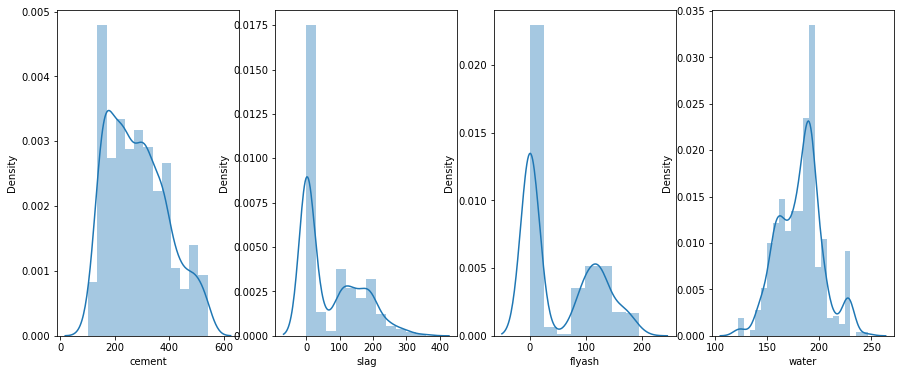

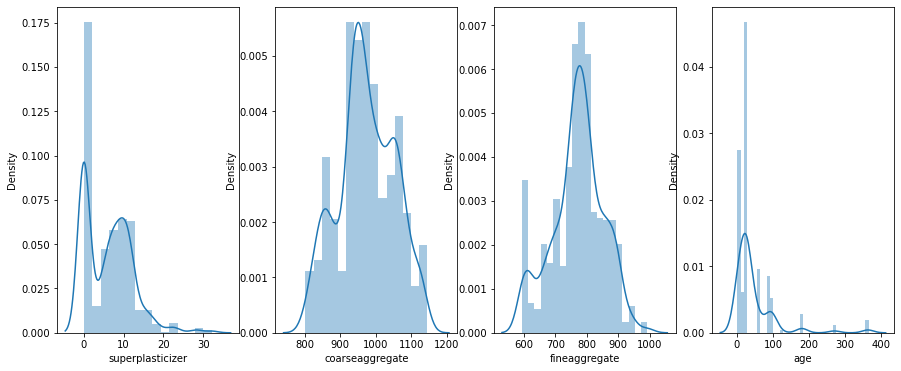

In [8]:
plotDitribution(df_concrete)

####  Below columns we can assume roughly follow normal distribution
#### Mean is greater than median, hence positive skwed / right skewed 
        1.Cement
        2.coarseaggregate
        3.Age
#### Mean is less than median, hence negative skwed / left skewed 
       1.Water
       2. fineaggregate
       3.csMPa
####  Below columns have follow Bimodal Distribution   
        1.flyash
        2.slag
        3.superplasticizer

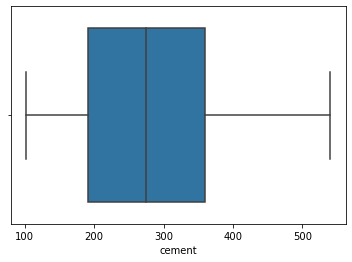

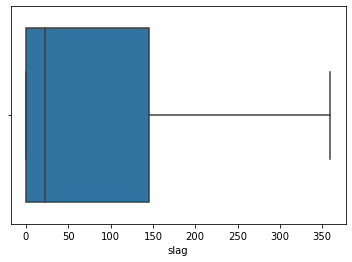

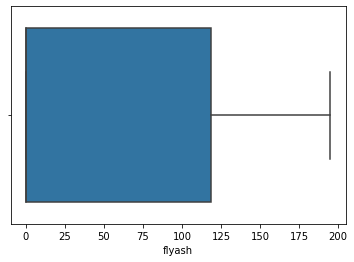

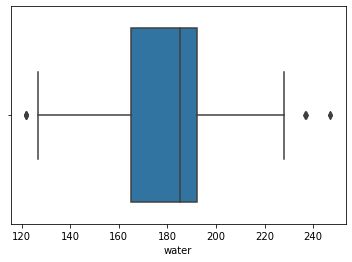

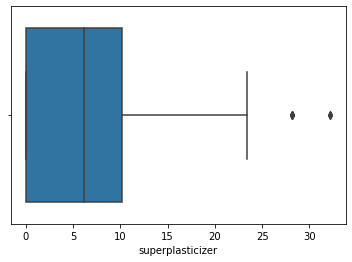

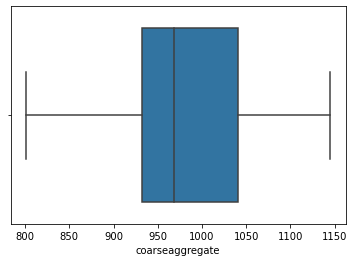

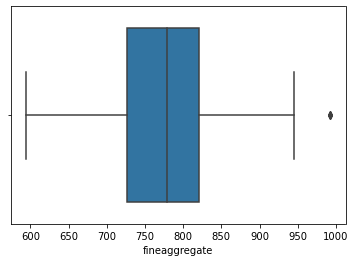

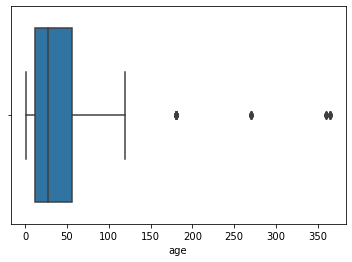

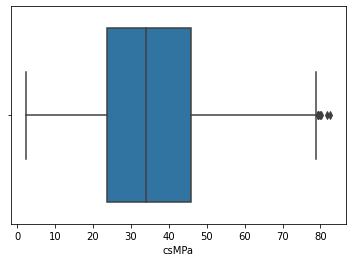

In [9]:
# Check for Outliers
l=['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age','csMPa']
for i in l:
    sns.boxplot(x=df_concrete[i])
    plt.show()

In [10]:
# We can remove outier associated with age as age outloers seems to be concer more , 
# hence diosccarding data whose age more than 250
# df_concrete = df_concrete[df_concrete["age"]>250]

In [11]:
# Lets tarnsform below bimodal observation and lets see the distribution again 

df_concrete["flyash_trfr"] = (np.power((df_concrete["flyash"]),4))
df_concrete["slag_trfr"] = (np.power((df_concrete["slag"]),4))
df_concrete["superplasticizer_trfr"] = (np.power((df_concrete["superplasticizer"]),4))


In [12]:

# Lets tarnsformn for prod/test/submission data set as well 

df_concrete_p["flyash_trfr"] = (np.power((df_concrete_p["flyash"]),4))
df_concrete_p["slag_trfr"] = (np.power((df_concrete_p["slag"]),4))
df_concrete_p["superplasticizer_trfr"] = (np.power((df_concrete_p["superplasticizer"]),4))

<AxesSubplot:xlabel='superplasticizer_trfr', ylabel='Density'>

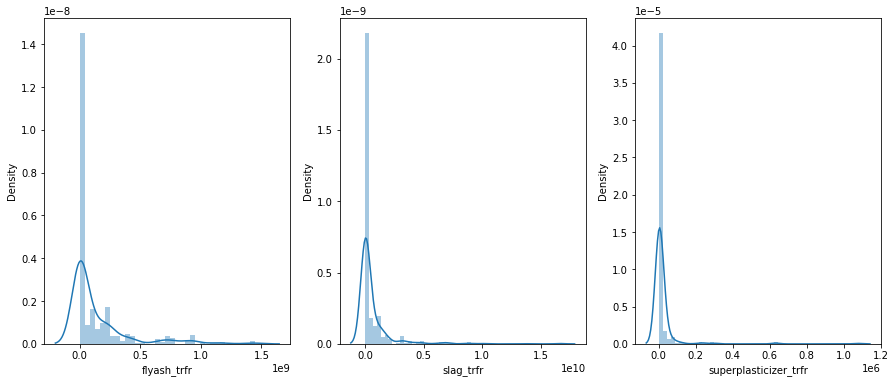

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.distplot(df_concrete["flyash_trfr"])

plt.subplot(1,3,2)
sns.distplot(df_concrete["slag_trfr"])

plt.subplot(1,3,3)
sns.distplot(df_concrete["superplasticizer_trfr"])



#### It may be concluded that the after power transformartion on above 3 observations , they are right skewed normally distributed.

In [30]:
#['slag','flyash','superplasticizer']
df_EDA = df_concrete.loc[:,(df_concrete.columns[df_concrete.columns!='flyash'] & 
                   df_concrete.columns[df_concrete.columns!='slag'] & 
                   df_concrete.columns[df_concrete.columns!='superplasticizer'] & 
                   df_concrete.columns[df_concrete.columns!='csMPa'])]
df_EDA['csMPa'] = df_concrete['csMPa']

In [31]:
# Do for Prod data as well 
df_concrete_prod = df_concrete_p.loc[:,(df_concrete_p.columns[df_concrete_p.columns!='flyash'] & 
                   df_concrete_p.columns[df_concrete_p.columns!='slag'] & 
                   df_concrete_p.columns[df_concrete_p.columns!='superplasticizer'] & 
                   df_concrete_p.columns[df_concrete_p.columns!='csMPa'])]

In [32]:
df_concrete_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     206 non-null    int64  
 1   cement                 206 non-null    float64
 2   water                  206 non-null    float64
 3   coarseaggregate        206 non-null    float64
 4   fineaggregate          206 non-null    float64
 5   age                    206 non-null    int64  
 6   flyash_trfr            206 non-null    float64
 7   slag_trfr              206 non-null    float64
 8   superplasticizer_trfr  206 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 14.6 KB


###  TV Univariate Analysis

<AxesSubplot:xlabel='csMPa', ylabel='Density'>

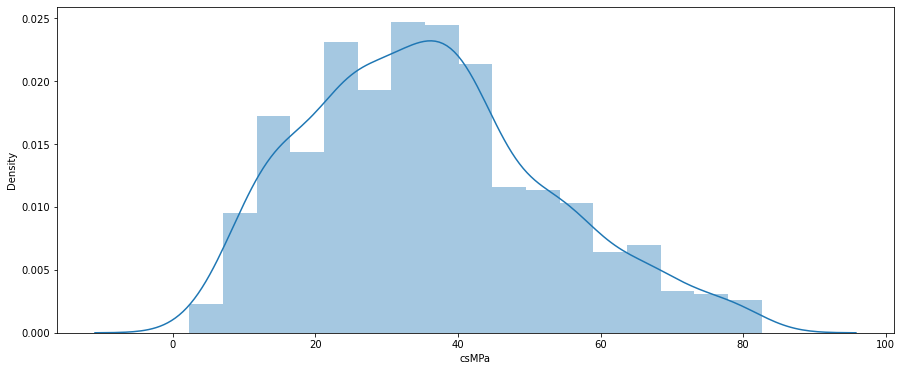

In [33]:
    plt.figure(figsize=(15,6))
    #plt.subplot(1,4,1)
    sns.distplot(df_EDA["csMPa"])

## Bivariate Analysis

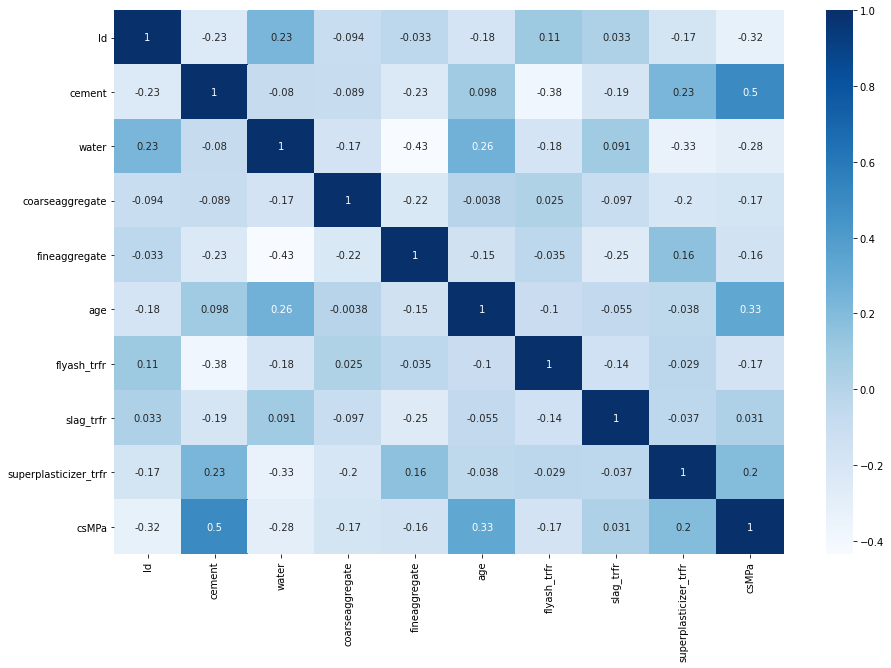

In [34]:
#Pair plot 
# sns.pairplot(df_EDA)
corr = df_EDA.corr() 
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

    1.We can observe a high positive correlation between compressive Strength (CC_Strength) and Cement.
    
    2. Also, Age and Super Plasticizer are the other two factors influencing Compressive strength.
    
    3.A strong negative correlation between Super Plasticizer and Water.
   
    

#### Let us try csMPa vs (cement, age, water)

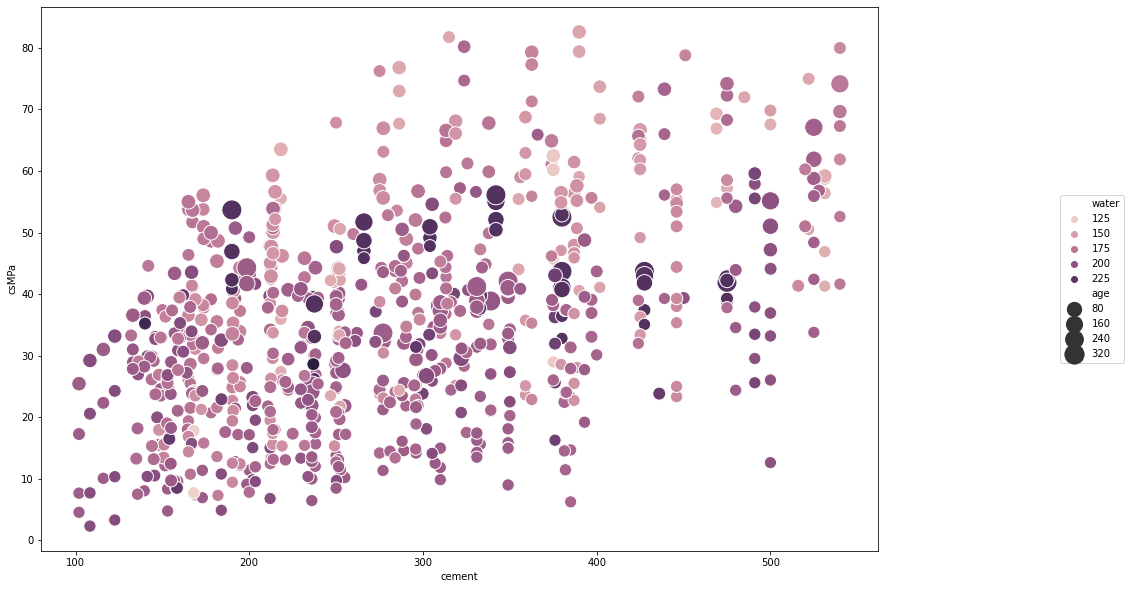

In [35]:
plt.figure(figsize=(15,10))
g = sns.scatterplot(y="csMPa", x="cement", hue="water",size="age", data=df_EDA, sizes=(150, 400))
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
plt.show()

#### The observations we can make from this plot
    1. Compressive strength increases as the amount of cement increases.
    
    2. Compressive strength increases with age (as the size of dots represents the age), this not the case always.
    
    3. Cement with less age requires more cement for higher strength, as the smaller dots are moving up when we move towards right on the x-axis.
    
    4.The older the cement is the more water it requires, can be confirmed by observing the colour of the dots. Larger dots with dark colour indicate high age and more water.
    

#### Let us try csMPa vs  (Fine aggregate, Super Plasticizer, Fly Ash)

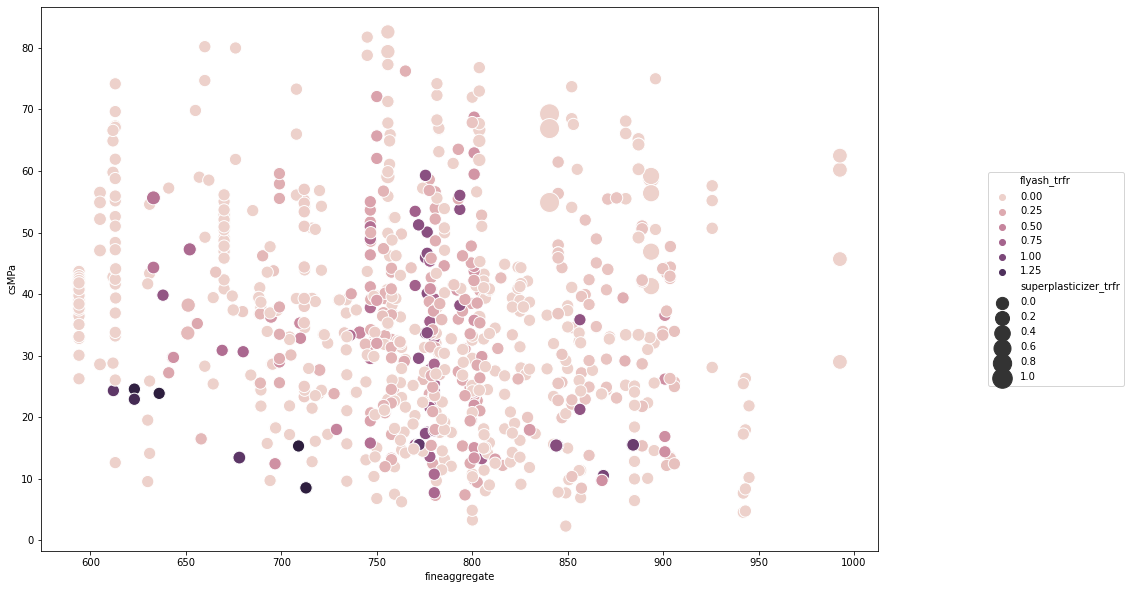

In [36]:
plt.figure(figsize=(15,10))
g = sns.scatterplot(y="csMPa", x="fineaggregate", hue="flyash_trfr",size="superplasticizer_trfr", data=df_EDA, sizes=(150, 400))
g.legend(loc='right', bbox_to_anchor=(1.30, 0.5), ncol=1)
plt.show()

    1.  Compressive strength decreases as Fly ash increases,as darker dots are concentrated in the region representing low/below mean of compressive strength.
    
    2.  Compressive strength increases with Superplasticizer since larger the dot the higher they are in the plot.


## Data pre-processing

In [37]:
#display(df_EDA)
df_EDA.info()
# df_concrete_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     824 non-null    int64  
 1   cement                 824 non-null    float64
 2   water                  824 non-null    float64
 3   coarseaggregate        824 non-null    float64
 4   fineaggregate          824 non-null    float64
 5   age                    824 non-null    int64  
 6   flyash_trfr            824 non-null    float64
 7   slag_trfr              824 non-null    float64
 8   superplasticizer_trfr  824 non-null    float64
 9   csMPa                  824 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 64.5 KB


In [38]:
# As we can see all data types of dataset are continuous numeric in nature , 
# so no need to apply any categorical label encoding technique
# Also there are no missing values in dataset so we can directly split the datset into train / test amd 
# apply scaling , using Standard scaler as below. 

X = pd.DataFrame(df_EDA.iloc[:,1:-1]) # Features . removed Id column as well 
y = pd.DataFrame(df_EDA.iloc[:,-1]) # Target

# Do the train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) 

sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [39]:
c_prod_col_names = df_concrete_prod.columns[df_concrete_prod.columns!='Id']

In [40]:
# Transform the prod dataset using same scaler of train 
df_concrete_prod_EDA = pd.DataFrame(df_concrete_prod[df_concrete_prod.columns[df_concrete_prod.columns!='Id']]) 
X_prod = pd.DataFrame(sc.transform(df_concrete_prod_EDA),columns=c_prod_col_names)

In [41]:
X.info()
X_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cement                 824 non-null    float64
 1   water                  824 non-null    float64
 2   coarseaggregate        824 non-null    float64
 3   fineaggregate          824 non-null    float64
 4   age                    824 non-null    int64  
 5   flyash_trfr            824 non-null    float64
 6   slag_trfr              824 non-null    float64
 7   superplasticizer_trfr  824 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 51.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cement                 206 non-null    float64
 1   water                  206 non-null    float64
 2   coarseag

## Model Development & Evaluation

### 1. Linear Regression

Let us start with regression models since this is the go-to algorithm for any regression problem


In [42]:
# Importing models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Linear Regression 
lr = LinearRegression() 

# Lasso Regression 
lasso = Lasso() 

# Ridge Regression 
ridge = Ridge() 

# Fitting models on Training data 
lr.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
ridge.fit(X_train, y_train) 

# Making predictions on Test data 
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_ridge = ridge.predict(X_test) 

print("Model\t\t\t RMSE \t\t R2") 
print("""LinearRegression \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr))) 
print("""LassoRegression \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso))) 
print("""RidgeRegression \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge)))


Model			 RMSE 		 R2
LinearRegression 	 11.66 		0.52
LassoRegression 	 11.82 		0.51
RidgeRegression 	 11.66 		0.52


#### There is not much difference between the performance with these three algorithms, 
#### we can plot the coefficients assigned by the three algorithms for the features with the following code.

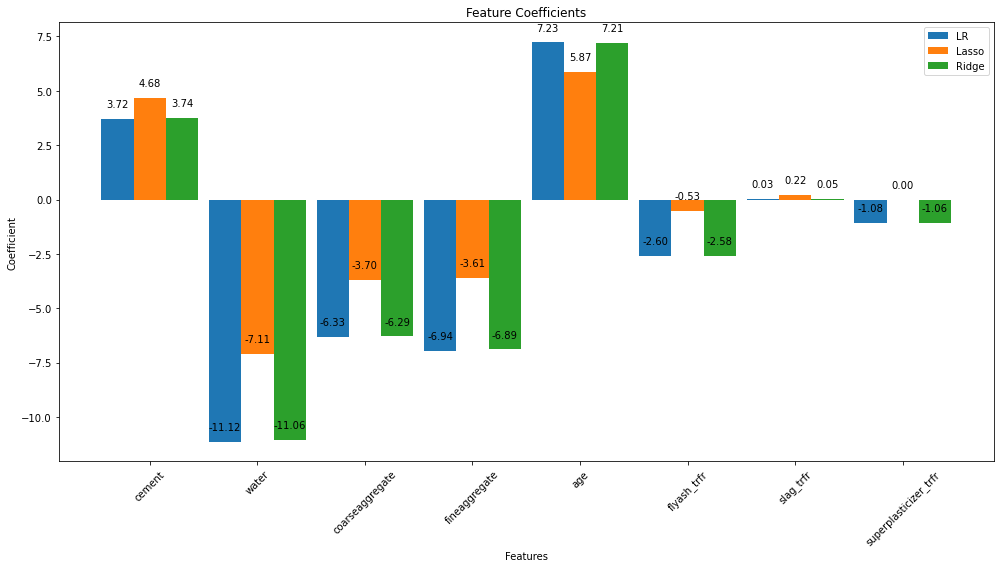

In [43]:
coeff_lr = lr.coef_ 
coeff_lasso = lasso.coef_ 
coeff_ridge = ridge.coef_ 

labels = X.columns
x = np.arange(len(labels)) 
width = 0.3 

# print(x)


fig, ax = plt.subplots(figsize=(14,8)) 
rects1 = ax.bar(x - 2*(width/2), coeff_lr[0], width, label='LR') 
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso') 
rects3 = ax.bar(x + 2*(width/2), coeff_ridge[0], width, label='Ridge')

ax.set_ylabel('Coefficient') 
ax.set_xlabel('Features') 
ax.set_title('Feature Coefficients') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend() 

def PlaceLabel(rects): 
   """Attach a text label above each bar in *rects*, displaying its height.""" 
   for rect in rects: 
      height = rect.get_height() 
      ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height+0.3), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom') 
        
        
PlaceLabel(rects1) 
PlaceLabel(rects2) 
PlaceLabel(rects3) 
fig.tight_layout() 
plt.show()


 1. As seen in the figure, Lasso regression pushes the coefficients towards zero.
 
 2. The coefficients with the normal Linear Regression and Ridge Regression are almost the same.

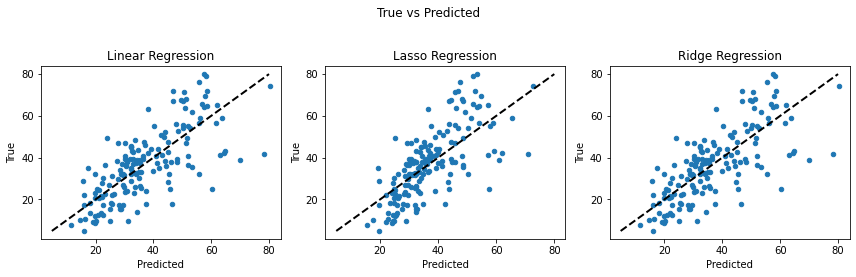

In [44]:
#Lets Plot True vs Predicted 

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4)) 

ax1.scatter(y_pred_lr, y_test, s=20) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Linear Regression") 

ax2.scatter(y_pred_lasso, y_test, s=20) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("True") 
ax2.set_xlabel("Predicted") 
ax2.set_title("Lasso Regression") 

ax3.scatter(y_pred_ridge, y_test, s=20) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True") 
ax3.set_xlabel("Predicted") 
ax3.set_title("Ridge Regression") 

fig.suptitle("True vs Predicted") 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

As we can see here, none of the model predicts the Compressive Strength correctly.

### 2. Decision Tree

Model				 RMSE 		 R2
Decision Tree Regressor 	 8.15 		0.76


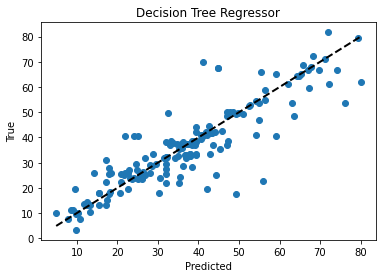

In [45]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(X_train, y_train) 

y_pred_dtr = dtr.predict(X_test) 

print("Model\t\t\t\t RMSE \t\t R2") 
print("""Decision Tree Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_dtr)), r2_score(y_test, y_pred_dtr))) 

plt.scatter(y_test, y_pred_dtr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 

plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Decision Tree Regressor") 

plt.show()

The Root Mean Squared Error (RMSE) has come down from 11.66 to 8.26, so the Decision Tree Regressor has improved the performance by a significant amount. 

This can be observed in the plot as well as more points are closer to the line.

### 3. Random Forest

Model				 RMSE 		 R2
Random Forest Regressor 	 6.61 		0.85


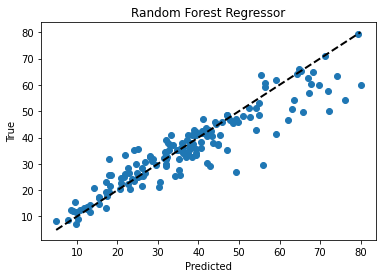

In [46]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(X_train, y_train) 
y_pred_rfr = rfr.predict(X_test) 

print("Model\t\t\t\t RMSE \t\t R2") 
print("""Random Forest Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_rfr)), r2_score(y_test, y_pred_rfr))) 

plt.scatter(y_test, y_pred_rfr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 

plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Random Forest Regressor") 
plt.show()



In [48]:
def autolabel(rects): 
   """Attach a text label above each bar in *rects*, displaying its height.""" 
   for rect in rects: 
      height = rect.get_height() 
      ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

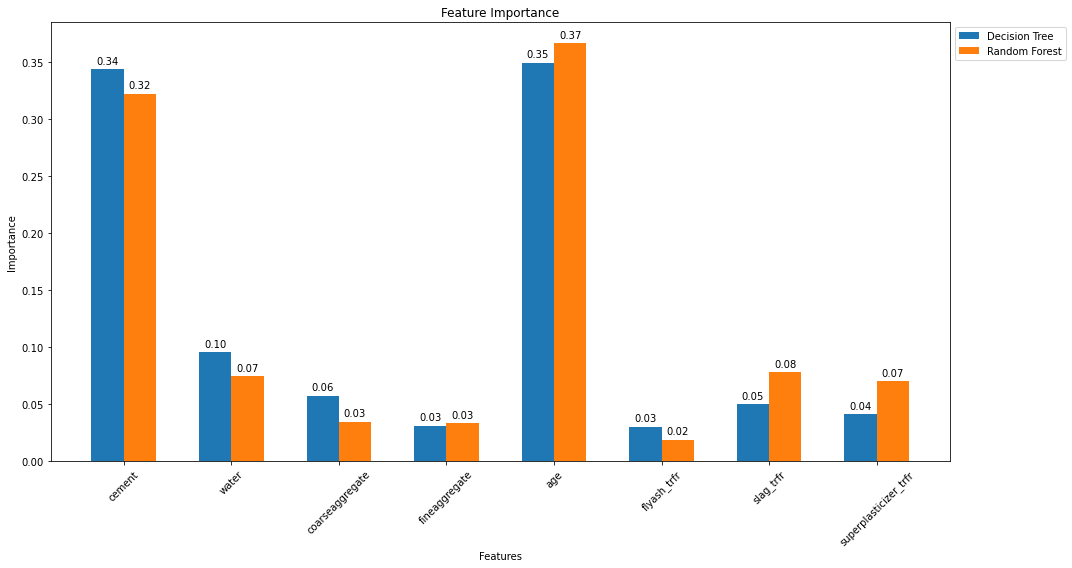

In [49]:
feature_dtr = dtr.feature_importances_ 
feature_rfr = rfr.feature_importances_ 
labels = X.columns

x = np.arange(len(labels)) 

width = 0.3 
fig, ax = plt.subplots(figsize=(15,8)) 

rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree') 
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest') 

ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Feature Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 

ax.legend(loc="upper left", bbox_to_anchor=(1,1)) 

autolabel(rects1) 
autolabel(rects2) 

fig.tight_layout() 
plt.show()

The RMSE has further reduced by ensembling multiple trees. We can plot the feature importance’s for tree-based models. 
The feature importance’s show how important a feature is for a model when making a prediction.

### 4 Random Forest with RandomizedsearchCV

In [50]:

#-------------------------------------------------------------------------------------------------------------------------------
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------


#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model
#-------------------------------------------------------------------------------------------------------------------

In [51]:
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(1,70),\
              "min_samples_split": sp_randint(1, 10),\
              "min_samples_leaf": sp_randint(1, 4),\
              "bootstrap": [True, False],\
              "n_estimators": list(range(1,100,1)),\
              'max_features': ['sqrt', 'log2', None]\
             }
# run randomized search
n_iter_search = 10
# [4, , 700, 1000, 1500],

In [52]:
model = RandomForestRegressor(random_state = 42)
 
rf_rs_cv = RandomizedSearchCV(model, 
                              param_distributions = param_dist,\
                                   n_iter = n_iter_search,
                                   cv=15,\
                                   n_jobs = -1)

In [53]:
rf_rs_cv.fit(X_train,y_train)
print("Train Score: " + str(rf_rs_cv.best_score_))

Train Score: 0.8627756317969083


In [54]:
print("best parameters: " + str(rf_rs_cv.best_params_))

best parameters: {'bootstrap': True, 'max_depth': 29, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 19}


Model				 RMSE 		 R2
Random Search CV 	 6.28 		0.86


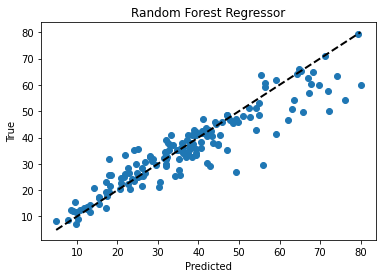

In [68]:
y_pred_rf_rs_cv = rf_rs_cv.predict(X_test) 


print("Model\t\t\t\t RMSE \t\t R2") 
print("""Random Search CV \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_rf_rs_cv)), r2_score(y_test, y_pred_rf_rs_cv))) 

plt.scatter(y_test, y_pred_rfr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 

plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Random Forest Regressor") 
plt.show()

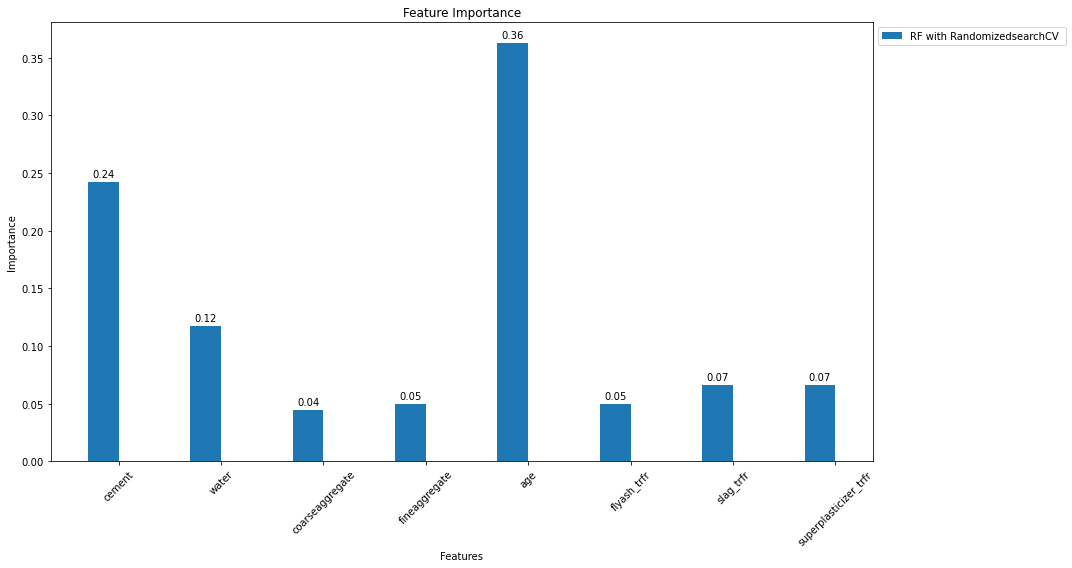

In [69]:
feature_dtr = rf_rs_cv.best_estimator_.feature_importances_ 

labels = X.columns

x = np.arange(len(labels)) 

width = 0.3 
fig, ax = plt.subplots(figsize=(15,8)) 
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='RF with RandomizedsearchCV ') 


ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Feature Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 

ax.legend(loc="upper left", bbox_to_anchor=(1,1)) 

autolabel(rects1) 

fig.tight_layout() 
plt.show()

In [57]:
# X_train = pd.DataFrame(X_train)

In [58]:
# Removing Column whose feature importance score is at or below 0.05
# namely flyash_trfr ,coarseaggregate,coarseaggregate

In [59]:
#X_train_Featured = X_train.loc[:,X_train.columns[X_train.columns!='flyash_trfr'] & 
 #                  X_train.columns[X_train.columns!='coarseaggregate'] & 
 #                  X_train.columns[X_train.columns!='coarseaggregate'] ]

In [60]:
#df_concrete_prod_EDA = df_concrete_prod_EDA.loc[:,df_concrete_prod_EDA.columns[df_concrete_prod_EDA.columns!='flyash_trfr'] & 
#                   df_concrete_prod_EDA.columns[df_concrete_prod_EDA.columns!='coarseaggregate'] & 
#                   df_concrete_prod_EDA.columns[df_concrete_prod_EDA.columns!='fineaggregate'] ]

In [70]:
# rf_rs_cv.fit(X_train,y_train)
# print("Train Score: " + str(rf_rs_cv.best_score_))

In [71]:
# y_pred_rf_rs_cv = rf_rs_cv.predict(X_test) 


# print("Model\t\t\t\t\t\t RMSE \t\t R2") 
# print("""Random Search CV with Eliminated Features \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_rf_rs_cv)), r2_score(y_test, rf_rs_cv.predict(X_test) ))) 

# plt.scatter(y_test, y_pred_rfr) 
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 

# plt.xlabel("Predicted") 
# plt.ylabel("True") 
# plt.title("Random Forest Regressor") 
# plt.show()

In [72]:
# As we can see there no much significant improvement in RMSE and R square has not changed so removing some features has not helped sp much. 

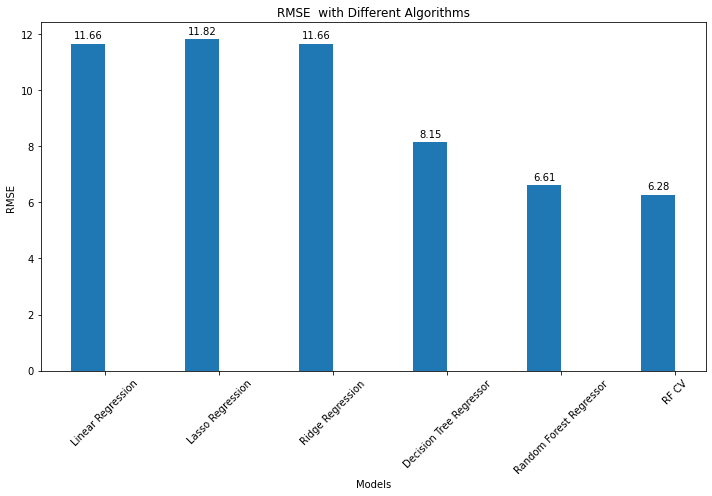

In [73]:
models = [lr, lasso, ridge, dtr, rfr,rf_rs_cv] 
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree Regressor",
         "Random Forest Regressor","RF CV"] 
rmses = [] 
r2s = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))) 
    #r2s.append(np.sqrt(r2_score(y_test, model.predict(X_test)))) 
    
x = np.arange(len(names)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,7)) 
rects = ax.bar(x-(width/2), rmses, width,label='RMSE') 
#rects2 = ax.bar(x+(width/2), r2, width, label='R Sqaure') 

ax.set_ylabel('RMSE ') #  & R Sqaure
ax.set_xlabel('Models') 
ax.set_title('RMSE  with Different Algorithms') #& R Sqaured
ax.set_xticks(x) 
ax.set_xticklabels(names, rotation=45) 

autolabel(rects) 
#autolabel(rects2)

fig.tight_layout() 
plt.show()

In [ ]:
# It is concluded from above chart the "Random Forest With Cross validation (RF CV)" model has least RMSE & Optimum R Sqaure Value 
# Hence Accepting the "Random Forest Regressor" as final model
# Lets pass prod values to final model as below. 
# X_train.info()

In [84]:
y_prod_pred_rfr = pd.DataFrame(rf_rs_cv.predict(X_prod),columns=["csMPa"])# rfr 

In [85]:
y_prod_pred_rfr.head(3)

,csMPa
0,49.68656
1,34.94568
2,70.83335


In [86]:
# display(pd.DataFrame(y_prod_pred_rfr))
#X_prod.head()
# df_concrete_p.info()
df_id = pd.DataFrame(df_concrete_p["Id"],columns=["Id"])

In [89]:
df_id.head(3)

,Id
0,31
1,109
2,136


In [91]:
sub_df = pd.merge(left=df_id,right=y_prod_pred_rfr,left_index=True,right_index=True)
#sub_df.head(10)
print(sub_df.shape)

(206, 2)


In [96]:
if sub_df.shape[0]==206 and sub_df.shape[1]==2:
    sub_df.to_csv("submission.csv", index=False, header=False)
    print("File exported successfully")
else:
    print("Issue in export please check submit result datafrane")

File exported successfully
